In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk 
import pandas as pd
%matplotlib inline

In [115]:
messages=[line.rstrip() for line in open ("smsspamcollection/SMSSpamCollection")]

In [116]:
print(len(messages))

5574


In [117]:
for mess_no,message in enumerate(messages[0:10]):
    
    print(mess_no,message)
    print('\n')


0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

# converting the data into proper csv file to perform analysis

In [118]:
messages =pd.read_csv("smsspamcollection/SMSSpamCollection",sep='\t',names=['lable','message'])
messages

,lable,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [119]:
messages.describe()

,lable,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [120]:
messages.groupby('lable').describe()

message                                                               
        count unique                                                top freq
lable                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [121]:
messages['length']= messages['message'].apply(len)
messages

,lable,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


ploting the data on basis of length

<AxesSubplot:>

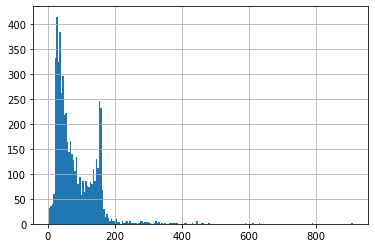

In [122]:
messages['length'].hist(bins=200)

checking the factors of data on the basis of length

In [123]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [124]:
kk=messages[messages['length']==910]
kk

,lable,message,length
1085,ham,For me the love should start with attraction.i...,910


In [125]:
df=kk['message'].iloc[0]
df

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

distributing the data on basis of spam and ham according to their length

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

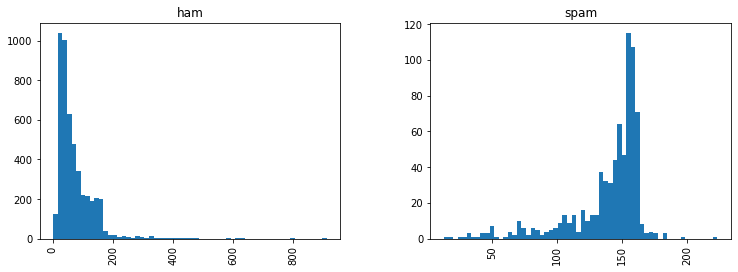

In [126]:
messages.hist(column='length',by='lable',bins=60,figsize=(12,4))

In [127]:
import string

creating a sample function to remove the punctuation from the data 

In [128]:
nopunc=[c for c in df if c not in string.punctuation]

In [139]:
from nltk.corpus import stopwords as stp

In [140]:
stp.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [141]:
nopunc=''.join(nopunc)
nopunc

'For me the love should start with attractioni should feel that I need her every time around meshe should be the first thing which comes in my thoughtsI would start the day and end it with hershe should be there every time I dreamlove will be then when my every breath has her namemy life should happen around hermy life will be named to herI would cry for herwill give all my happiness and take all her sorrowsI will be ready to fight with anyone for herI will be in love when I will be doing the craziest things for herlove will be when I dont have to proove anyone that my girl is the most beautiful lady on the whole planetI will always be singing praises for herlove will be when I start up making chicken curry and end up makiing sambarlife will be the most beautiful thenwill get every morning and thank god for the day because she is with meI would like to say a lotwill tell later'

In [142]:
nopunc.split()

['For',
 'me',
 'the',
 'love',
 'should',
 'start',
 'with',
 'attractioni',
 'should',
 'feel',
 'that',
 'I',
 'need',
 'her',
 'every',
 'time',
 'around',
 'meshe',
 'should',
 'be',
 'the',
 'first',
 'thing',
 'which',
 'comes',
 'in',
 'my',
 'thoughtsI',
 'would',
 'start',
 'the',
 'day',
 'and',
 'end',
 'it',
 'with',
 'hershe',
 'should',
 'be',
 'there',
 'every',
 'time',
 'I',
 'dreamlove',
 'will',
 'be',
 'then',
 'when',
 'my',
 'every',
 'breath',
 'has',
 'her',
 'namemy',
 'life',
 'should',
 'happen',
 'around',
 'hermy',
 'life',
 'will',
 'be',
 'named',
 'to',
 'herI',
 'would',
 'cry',
 'for',
 'herwill',
 'give',
 'all',
 'my',
 'happiness',
 'and',
 'take',
 'all',
 'her',
 'sorrowsI',
 'will',
 'be',
 'ready',
 'to',
 'fight',
 'with',
 'anyone',
 'for',
 'herI',
 'will',
 'be',
 'in',
 'love',
 'when',
 'I',
 'will',
 'be',
 'doing',
 'the',
 'craziest',
 'things',
 'for',
 'herlove',
 'will',
 'be',
 'when',
 'I',
 'dont',
 'have',
 'to',
 'proove',
 'an

remove the stop words of english such as 'a,the,if,there etc' by using NLP corpus to clean the data

In [143]:
clean_df=[words for words in nopunc.split() if words not in stp.words('english')]
clean_df

['For',
 'love',
 'start',
 'attractioni',
 'feel',
 'I',
 'need',
 'every',
 'time',
 'around',
 'meshe',
 'first',
 'thing',
 'comes',
 'thoughtsI',
 'would',
 'start',
 'day',
 'end',
 'hershe',
 'every',
 'time',
 'I',
 'dreamlove',
 'every',
 'breath',
 'namemy',
 'life',
 'happen',
 'around',
 'hermy',
 'life',
 'named',
 'herI',
 'would',
 'cry',
 'herwill',
 'give',
 'happiness',
 'take',
 'sorrowsI',
 'ready',
 'fight',
 'anyone',
 'herI',
 'love',
 'I',
 'craziest',
 'things',
 'herlove',
 'I',
 'dont',
 'proove',
 'anyone',
 'girl',
 'beautiful',
 'lady',
 'whole',
 'planetI',
 'always',
 'singing',
 'praises',
 'herlove',
 'I',
 'start',
 'making',
 'chicken',
 'curry',
 'end',
 'makiing',
 'sambarlife',
 'beautiful',
 'thenwill',
 'get',
 'every',
 'morning',
 'thank',
 'god',
 'day',
 'meI',
 'would',
 'like',
 'say',
 'lotwill',
 'tell',
 'later']

# creating a proper function with the help of sample function to clean the complete data

In [144]:
def text_process(df):
    """
    1. remove punctuation
    2. remove stopwords
    3. return clean text
    
    """
    nopunc=[char for char in df if char  not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return[word for word in nopunc.split() if word.lower()  not in stp.words('english')]

In [145]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

# Building a predictive machine learning model

In [146]:
from sklearn.feature_extraction.text import CountVectorizer

In [147]:
bow_transformer=CountVectorizer(analyzer=text_process)

In [148]:
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x0000017A38ECB820>)

In [149]:
print(len(bow_transformer.vocabulary_))

11425


BREAKDOWN OF WHAT EXACTLY THE FUNCTION bow_transformer DID...

In [150]:
mess4=messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [151]:
bow4 = bow_transformer.transform([mess4])

In [152]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


bow_transformer gives us the count of each word repeated and converts it into a numeric value

In [178]:
bow_transformer.get_feature_names()[4068] # to check what word got repeated

'U'

In [179]:
bow_transformer.get_feature_names()[9554]

'say'

In [155]:
messages_bow = bow_transformer.transform(messages['message'])

In [156]:
print('the shape of sparse metrics : ',messages_bow.shape)

the shape of sparse metrics :  (5572, 11425)


In [184]:
messages_bow.nnz  #non zero occurance values that non zero in sparse matrix (nnz)

50548

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

See below for a simple example.

Example:

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [159]:
from sklearn.feature_extraction.text import TfidfTransformer 

In [160]:
tfidf_tramsformer = TfidfTransformer().fit(messages_bow)

In [161]:
# what exactly we did

tfidf4=tfidf_tramsformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [162]:
lo = tfidf_tramsformer.idf_[bow_transformer.vocabulary_['love']]
print('tfidf weight for love: ',lo)


tfidf weight for love:  4.773658523649919


In [163]:
messages_tfidf = tfidf_tramsformer.transform(messages_bow)
messages_tfidf.shape

(5572, 11425)

# Creating a ML MODEL 

WE are using naive bayes method

In [164]:
from sklearn.naive_bayes import MultinomialNB

In [165]:
model=MultinomialNB()

In [166]:
spam_detection = model.fit(messages_tfidf,messages['lable'])

In [167]:
predictions= spam_detection.predict(messages_tfidf)
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [168]:
#Doing the same thing but on train test split

from sklearn.model_selection import train_test_split

In [169]:
x= messages['lable']
y= messages['message']

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Creating a Data Pipeline
Let's run our model again and then predict off the test set. We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

 Basically we are going to store the above process of CountVectorizer() TfidfTransformer() and MultinomialNB() 
 into a pipline provided by sklearn in form of a workflow.

In [171]:
from sklearn.pipeline import Pipeline

FINAL MODEL

In [172]:
process_pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf_transformation',TfidfTransformer()),
    ('predictive_model',MultinomialNB())
    
])

In [173]:
process_pipeline.fit(y_train,x_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000017A38ECB820>)),
                ('tfidf_transformation', TfidfTransformer()),
                ('predictive_model', MultinomialNB())])

In [174]:
y_pred = process_pipeline.predict(y_test)

In [175]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,x_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1510
        spam       0.72      1.00      0.84       162

    accuracy                           0.96      1672
   macro avg       0.86      0.98      0.91      1672
weighted avg       0.97      0.96      0.96      1672

